In [8]:
import pandas as pd
from sklearn import tree
from sklearn import model_selection
from sklearn import metrics
import graphviz
import matplotlib.pyplot as plt

ImportError: cannot import name 'score' from 'sklearn' (C:\Users\Martin\anaconda3\lib\site-packages\sklearn\__init__.py)

In [21]:
# data preprocessing

# load dataset with imputed values
data = pd.read_csv("data/data_imp.csv")

# replace floats in age, trestbps, chol, thalach, ca by integers
data.age = data.age.astype(int)
data.trestbps = data.trestbps.astype(int)
data.chol = data.chol.astype(int)
data.thalach = data.thalach.astype(int)
data.ca = data.ca.astype(int)


# replace numbers in sex by explaining string
data.loc[data['sex'] == 0, ['sex']] = "female"
data.loc[data['sex'] == 1, ['sex']] = "male"
data['sex'] = data.sex.astype('category')

# replace numbers in cp (chest pain) by explaining string
data.loc[data['cp'] == 1, ['cp']] = 'typical angina'
data.loc[data['cp'] == 2, ['cp']] = 'atypical angina'
data.loc[data['cp'] == 3, ['cp']] = 'non-anginal pain'
data.loc[data['cp'] == 4, ['cp']] = 'asymptomatic'
data['cp'] = data.cp.astype('category')

# replace numbers in fbs (fasting blood sugar>120 mg/dl) by boolean
data.loc[data['fbs'] == 0, ['fbs']] = False
data.loc[data['fbs'] == 1, ['fbs']] = True

# replace numbers in restecg (resting electrocardiographic results) by explaining string
data.loc[data['restecg'] == 0, ['restecg']] = "normal"
data.loc[data['restecg'] == 1, ['restecg']] = "abnormality"
data.loc[data['restecg'] == 2, ['restecg']] = "hypertrophy"
data['restecg'] = data.restecg.astype('category')

# replace numbers in exang (exercise induced angina) by boolean
data.loc[data['exang'] == 0, ['exang']] = False
data.loc[data['exang'] == 1, ['exang']] = True

# replace numbers in slope (slope of the peak exercise ST segment) by explaining string
data.loc[data['slope'] == 1, ['slope']] = "upsloping"
data.loc[data['slope'] == 2, ['slope']] = "flat"
data.loc[data['slope'] == 3, ['slope']] = "downsloping"
data['slope'] = data.slope.astype('category')

# replace numbers in thal by explaining string
data.loc[data['thal'] == 3, ['thal']] = "normal"
data.loc[data['thal'] == 6, ['thal']] = "fixed defect"
data.loc[data['thal'] == 7, ['thal']] = "reversable defect"
data['thal'] = data.thal.astype('category')

# replace numbers in num (diagnosis of heart disease (angiographic disease status)) by number 0 or 1
data.rename(columns={'num': 'hd'}, inplace=True)
hd_indices = data['hd'] > 0
data.loc[data.hd > 0, 'hd'] = 1

data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63,male,typical angina,145,233,True,hypertrophy,150,False,2.3,downsloping,0,fixed defect,0
1,67,male,asymptomatic,160,286,False,hypertrophy,108,True,1.5,flat,3,normal,1
2,67,male,asymptomatic,120,229,False,hypertrophy,129,True,2.6,flat,2,reversable defect,1
3,37,male,non-anginal pain,130,250,False,normal,187,False,3.5,downsloping,0,normal,0
4,41,female,atypical angina,130,204,False,hypertrophy,172,False,1.4,upsloping,0,normal,0


In [27]:
def create_decision_tree(data) :
    # split features and targets
    X = data.iloc[:,:13].copy()
    y = data['hd'].copy()

    # encode categorial values
    X_encode = pd.get_dummies(X, columns=['sex','cp','fbs','restecg','exang','slope','thal'])

    # split training and test data
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X_encode, y)

    # create decision tree
    dt = tree.DecisionTreeClassifier()
    dt = dt.fit(X_train, y_train)
    
    return dt
    
decision_tree = create_decision_tree(data)

# plot decision tree

#dot_data = tree.export_graphviz(dt, out_file=None) 
#graph = graphviz.Source(dot_data) 
#graph

#plt.figure(figsize=(15,7.5))
#tree.plot_tree(dt,
              #filled=True,
              #rounded=True,
              #class_names=['no_hd','yes_hd'],
              #feature_names=X_encode.columns)
#plt.show()

Accuracy:  0.9391304347826087


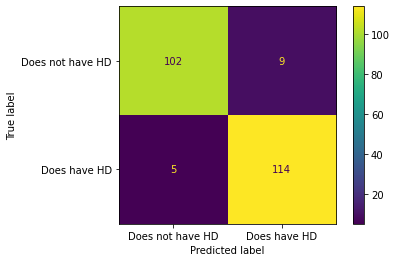

In [28]:
# evaluate classifier

# calculate confusion matrix
metrics.plot_confusion_matrix(decision_tree, X_test, y_test, display_labels=['Does not have HD','Does have HD'])

# check if the dataset is balanced
#print(len(data[data['hd']==0]))
#print(len(data[data['hd']==1]))

# calculate accuracy
y_pred = decision_tree.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: ', score)